In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import csv as DataFrame

In [8]:
df=pd.read_csv("student.csv")

# Getting top 5 records

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

# Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

# Check missing values

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Check Duplicates

In [12]:
df.duplicated().sum()

0

# Check Datatypes

In [13]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Check statistics of the dataset

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [16]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [17]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
count_cols=df[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']]

for category in count_cols:
    print(f"The value counts of {category}")
    val_counts=count_cols[category].value_counts()
    print(val_counts)
    print('*****************************************')

The value counts of gender
gender
female    518
male      482
Name: count, dtype: int64
*****************************************
The value counts of race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
*****************************************
The value counts of parental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
*****************************************
The value counts of lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
*****************************************
The value counts of test_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
*****************************************


# Finding numerical and categorical features

In [19]:
num_cols=[features for features in df.columns if df[features].dtypes!='object']
cat_cols=[features for features in df.columns if df[features].dtypes=='object']

print(f"We have {len(num_cols)} numerical features: {num_cols}")
print(f"We have {len(cat_cols)} categorical features: {cat_cols}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
df['TotalScore']=df['math_score']+df['reading_score']+df['writing_score']
df['AverageScore']=df['TotalScore']/3

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Let's see the distribution

<Axes: xlabel='AverageScore', ylabel='Count'>

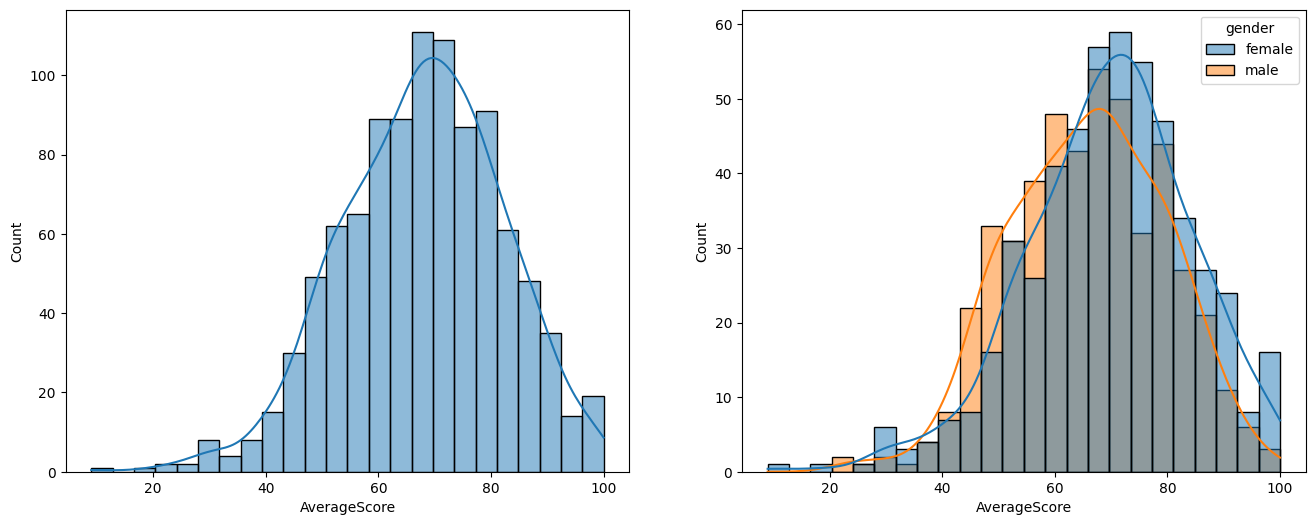

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='AverageScore',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='AverageScore',hue='gender',kde=True)

<Axes: xlabel='TotalScore', ylabel='Count'>

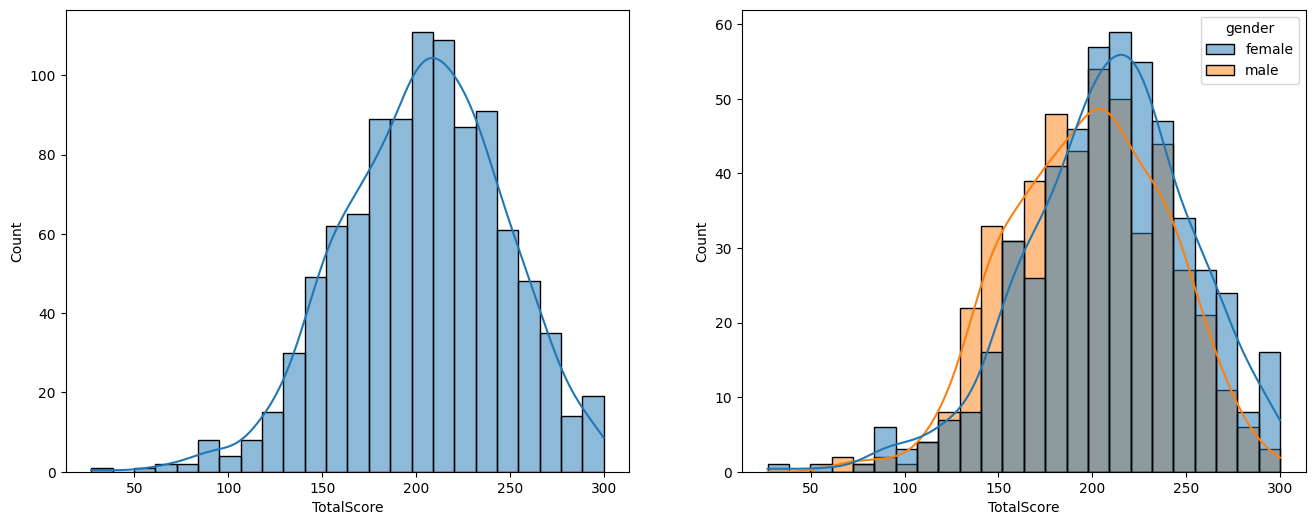

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x='TotalScore',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='TotalScore',hue='gender',kde=True)

In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


<Axes: xlabel='AverageScore', ylabel='Count'>

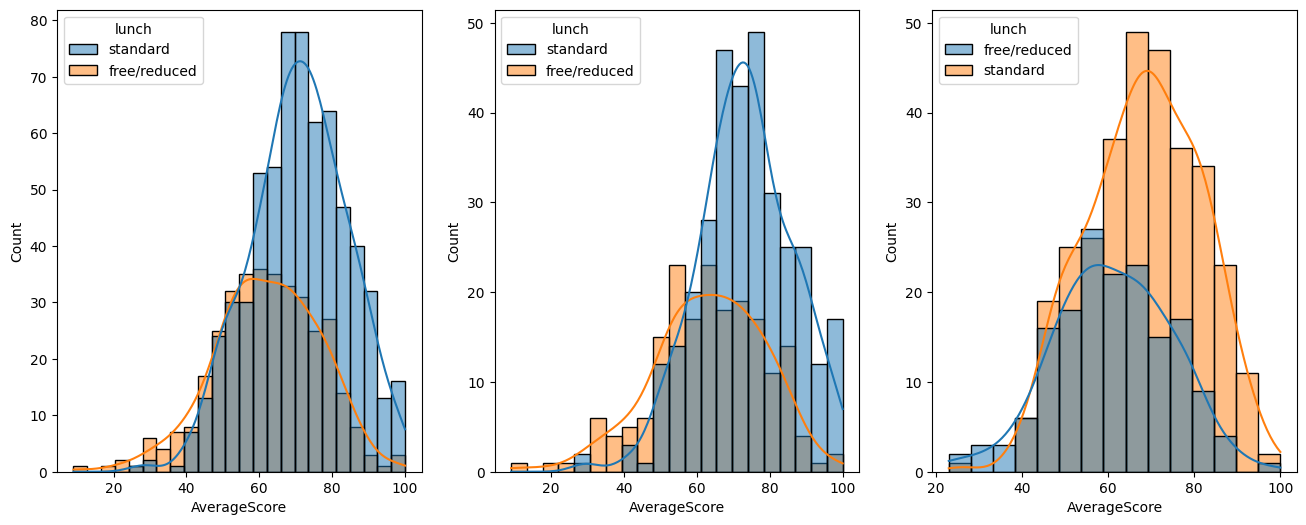

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AverageScore',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='AverageScore',hue='lunch',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='AverageScore',hue='lunch',kde=True)

<Axes: xlabel='AverageScore', ylabel='Count'>

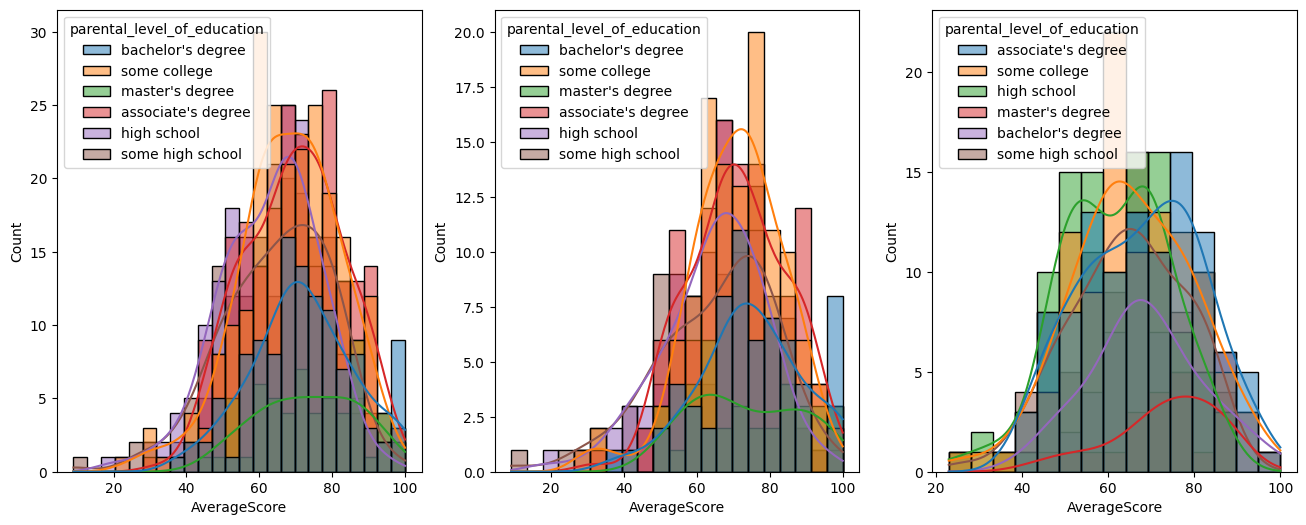

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AverageScore',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='AverageScore',hue='parental_level_of_education',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='AverageScore',hue='parental_level_of_education',kde=True)

<Axes: xlabel='AverageScore', ylabel='Count'>

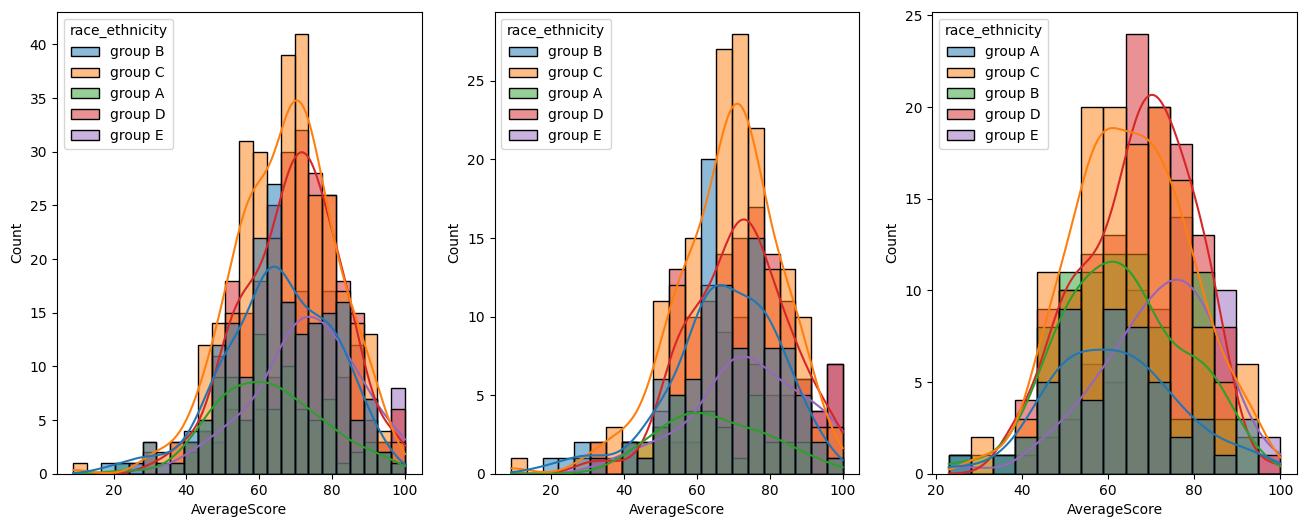

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='AverageScore',kde=True,hue='race_ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'],x='AverageScore',hue='race_ethnicity',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'],x='AverageScore',hue='race_ethnicity',kde=True)

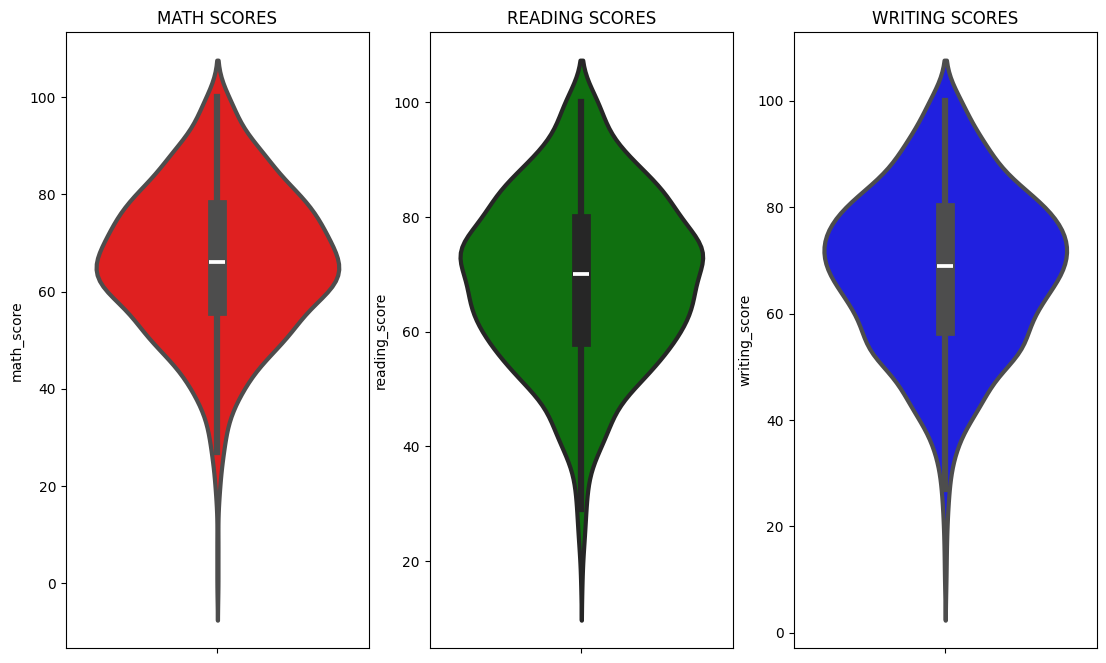

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [29]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


# Multivariate Analysis

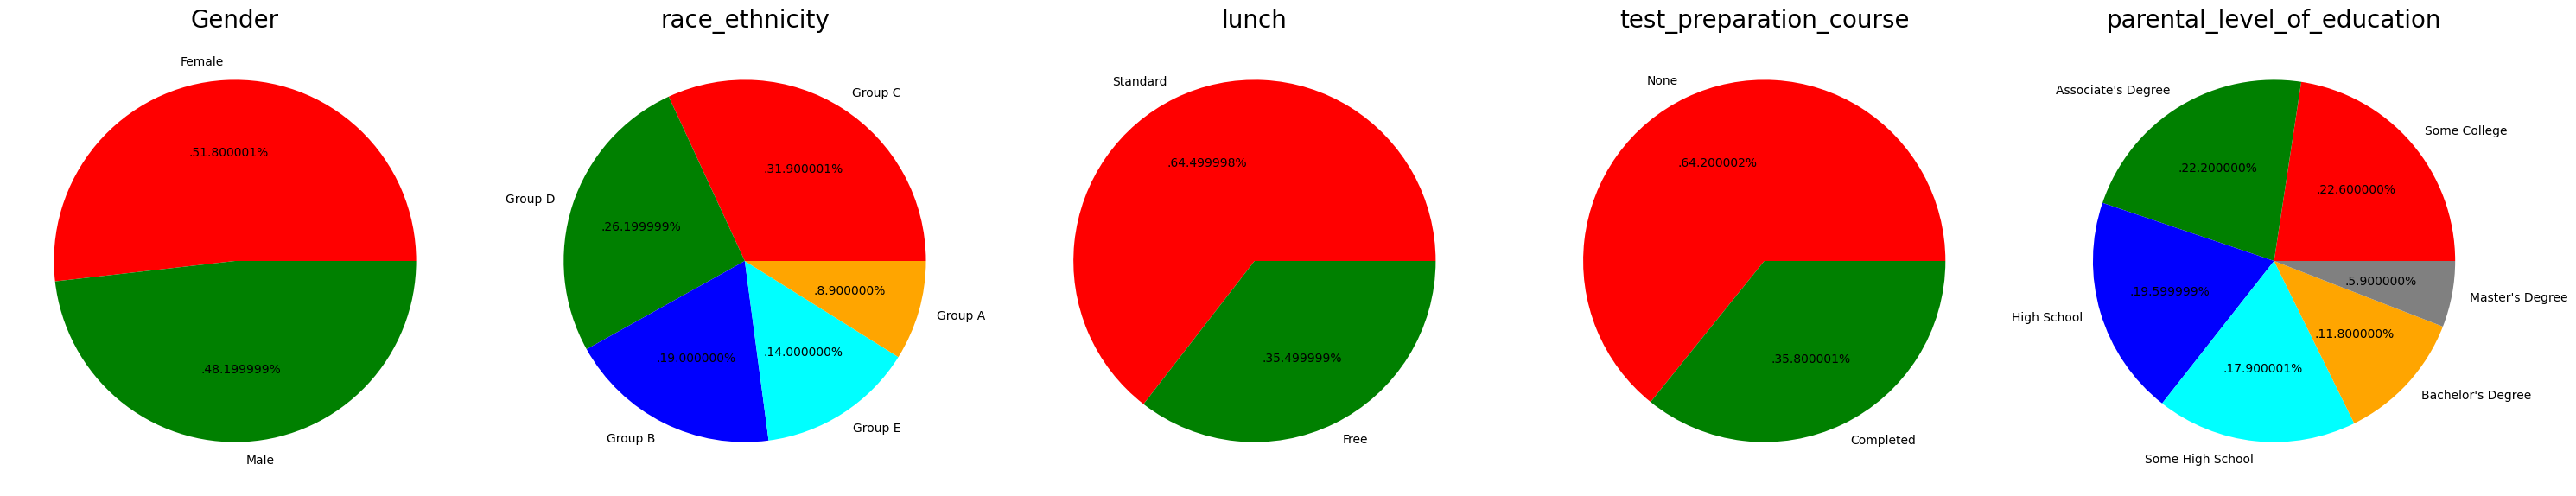

In [30]:
plt.figure(figsize=(30,12))
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('test_preparation_course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('parental_level_of_education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Univariate Analysis

([<matplotlib.patches.Wedge at 0x1c24628cf80>,
 [Text(-1.1980818587083752, -0.06782226650507366, 'Male'),
  Text(1.0982417038160106, 0.06217041096298404, 'Female')],
 [Text(-0.698881084246552, -0.03956298879462629, '51.80%'),
  Text(0.5990409293541875, 0.033911133252536745, '48.20%')])

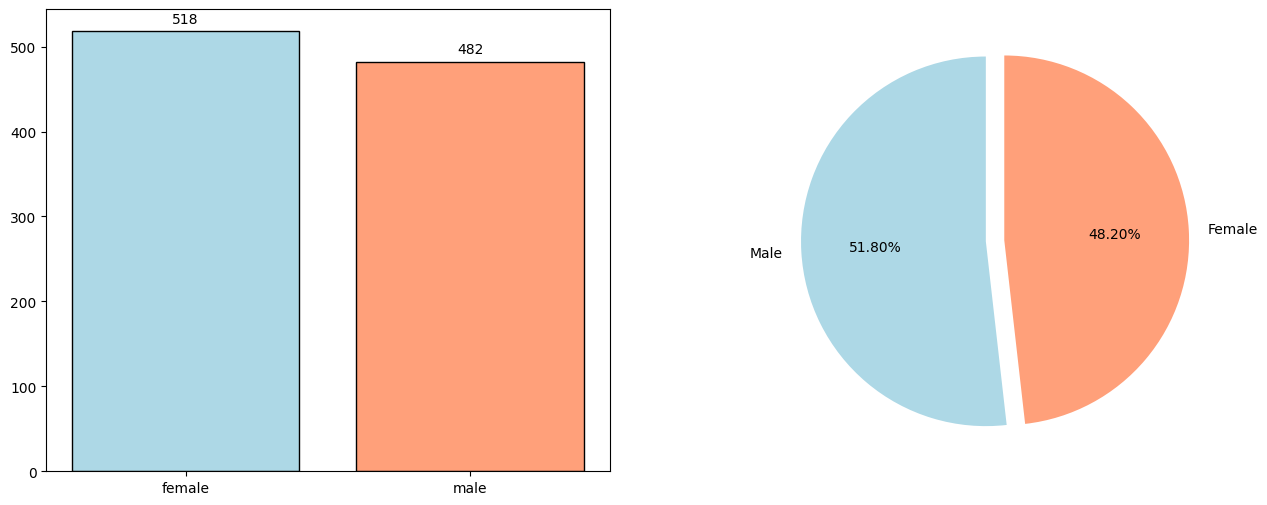

In [31]:
gender_counts=df['gender'].value_counts()

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.bar(gender_counts.index,gender_counts,color=['lightblue', 'lightsalmon'], edgecolor='black')

#Data Labels
for i,v in enumerate(gender_counts):
    plt.text(i,v+10,str(v),ha='center')

#Data for pie chart
plt.subplot(1,2,2)
plt.pie(gender_counts,labels=['Male','Female'],autopct='%.2f%%',colors=['lightblue', 'lightsalmon'],explode=(0.1,0),startangle=90)


#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

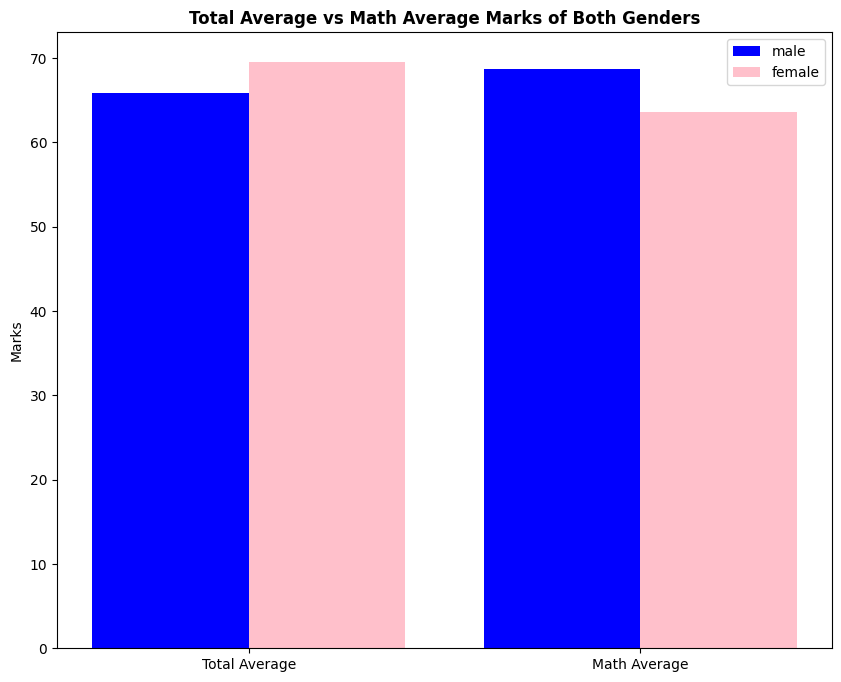

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'gender' and calculate the mean for desired columns
gender_group = df.groupby('gender')[['AverageScore', 'math_score']].mean()

plt.figure(figsize=(10, 8))

# Define categories
X = ['Total Average', 'Math Average']

# Extract scores for each gender
female_scores = [gender_group.loc['female', 'AverageScore'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'AverageScore'], gender_group.loc['male', 'math_score']]

# Bar positions
X_axis = np.arange(len(X))

# Plot bars
plt.bar(X_axis - 0.2, male_scores, width=0.4, label='male', color='blue')
plt.bar(X_axis + 0.2, female_scores, width=0.4, label='female', color='pink')

# Add labels, title, and legend
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs Math Average Marks of Both Genders", fontweight='bold')
plt.legend()

# Display the plot
plt.show()


# Univariate analysis(race_ethnicity)

([<matplotlib.patches.Wedge at 0x1c24d2cc8f0>,
 [Text(-0.9269044640242976, 0.5923243322469793, 'group A'),
  Text(-0.33991867422268845, -1.0461621742897658, 'group B'),
  Text(0.9832255636109514, -0.4932215435906335, 'group C'),
  Text(0.9250390474384775, 0.595233366600121, 'group D'),
  Text(0.3035701760610944, 1.057281962489778, 'group E')],
 [Text(-0.5055842531041622, 0.3230859994074432, '31.90%'),
  Text(-0.18541018593964823, -0.5706339132489631, '26.20%'),
  Text(0.5363048528787007, -0.2690299328676182, '19.00%'),
  Text(0.5045667531482604, 0.3246727454182478, '14.00%'),
  Text(0.16558373239696053, 0.5766992522671516, '8.90%')])

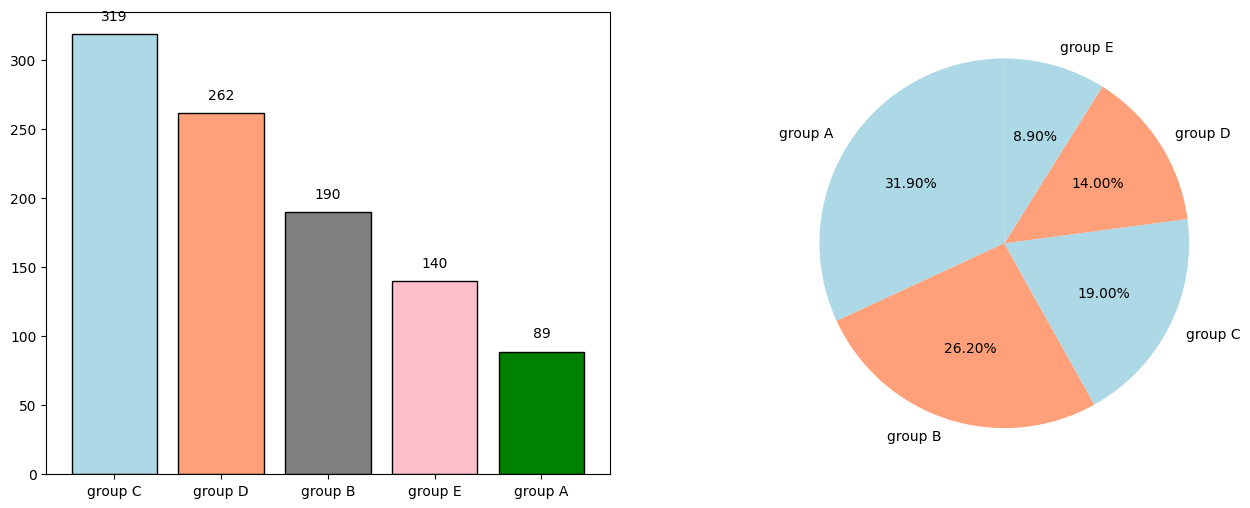

In [33]:
rc_counts=df['race_ethnicity'].value_counts()

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.bar(rc_counts.index,rc_counts,color=['lightblue', 'lightsalmon','grey','pink','green'], edgecolor='black')

#Data Labels
for i,v in enumerate(rc_counts):
    plt.text(i,v+10,str(v),ha='center')

#Data for pie chart
plt.subplot(1,2,2)
plt.pie(rc_counts,labels=['group A','group B','group C','group D','group E'],autopct='%.2f%%',colors=['lightblue', 'lightsalmon'],startangle=90)


#### BIVARIATE ANALYSIS ( Is race_ethnicity has any impact on student's performance ? ) 

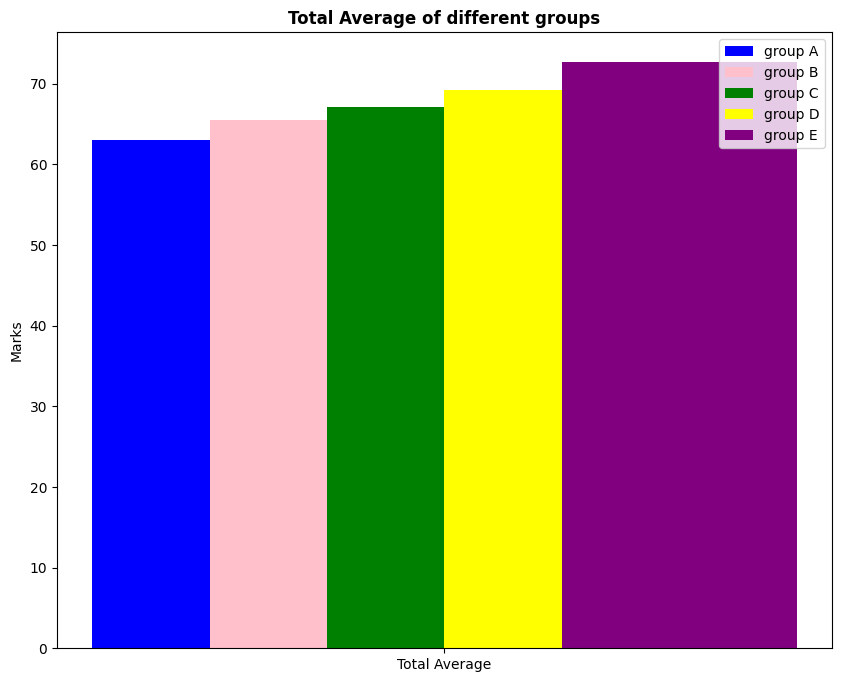

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'gender' and calculate the mean for desired columns
re_group = df.groupby('race_ethnicity')[['AverageScore']].mean()

plt.figure(figsize=(10, 8))

# Define categories
X = ['Total Average']

# Extract scores for each gender
A_scores = [re_group.loc['group A', 'AverageScore']]
B_scores = [re_group.loc['group B', 'AverageScore']]
C_scores = [re_group.loc['group C', 'AverageScore']]
D_scores = [re_group.loc['group D', 'AverageScore']]
E_scores = [re_group.loc['group E', 'AverageScore']]

# Bar positions
X_axis = np.arange(len(X))

# Plot bars
plt.bar(X_axis - 0.4, A_scores, width=0.4, label='group A', color='blue')
plt.bar(X_axis - 0.2, B_scores, width=0.4, label='group B', color='pink')
plt.bar(X_axis, C_scores, width=0.4, label='group C', color='green')
plt.bar(X_axis + 0.2, D_scores, width=0.4, label='group D', color='yellow')
plt.bar(X_axis + 0.4, E_scores, width=0.4, label='group E', color='purple')

# Add labels, title, and legend
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average of different groups", fontweight='bold')
plt.legend()

# Display the plot
plt.show()


# Univariate analysis(educational background of student's parents)

In [35]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,TotalScore,AverageScore
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


<Axes: xlabel='count', ylabel='parental_level_of_education'>

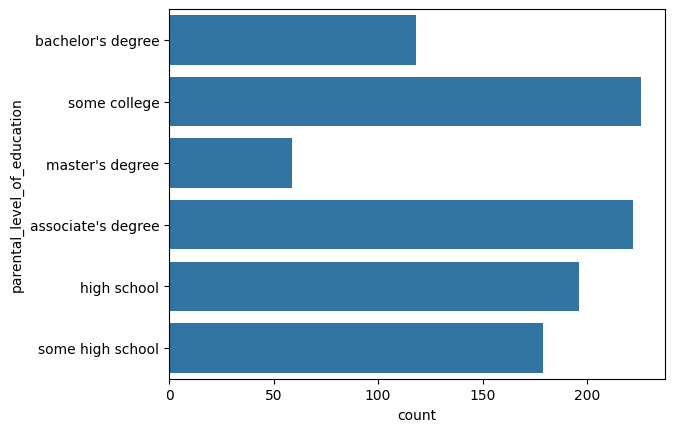

In [36]:
sns.countplot(data=df['parental_level_of_education'])

# Bivariate analysis (Parental education impact on student's performance)

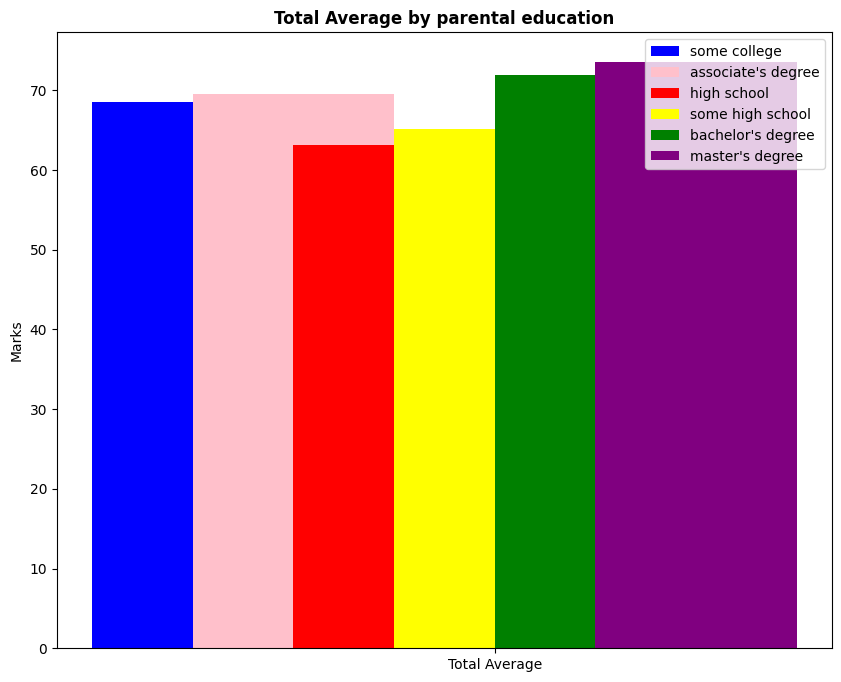

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'gender' and calculate the mean for desired columns
pe_group = df.groupby('parental_level_of_education')[['AverageScore']].mean()

plt.figure(figsize=(10, 8))

# Define categories
X = ['Total Average']

# Extract scores for each gender
somecollegescore = [pe_group.loc['some college', 'AverageScore']]
associatesdegreescore = [pe_group.loc["associate's degree", 'AverageScore']]
highschoolscore = [pe_group.loc["high school", 'AverageScore']]
somehighschooldegreescore = [pe_group.loc["some high school", 'AverageScore']]
bachelorsdegreescore = [pe_group.loc["bachelor's degree", 'AverageScore']]
mastersdegreescore = [pe_group.loc["master's degree", 'AverageScore']]

# Bar positions
X_axis = np.arange(len(X))

# Plot bars
plt.bar(X_axis - 0.6, somecollegescore, width=0.4, label='some college', color='blue')
plt.bar(X_axis - 0.4, associatesdegreescore, width=0.4, label="associate's degree", color='pink')
plt.bar(X_axis - 0.2, highschoolscore, width=0.4, label='high school', color='red')
plt.bar(X_axis, somehighschooldegreescore, width=0.4, label='some high school', color='yellow')
plt.bar(X_axis + 0.2, bachelorsdegreescore, width=0.4, label="bachelor's degree", color='green')
plt.bar(X_axis + 0.4, mastersdegreescore, width=0.4, label="master's degree", color='purple')

# Add labels, title, and legend
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average by parental education", fontweight='bold')
plt.legend()

# Display the plot
plt.show()


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

<Axes: xlabel='count', ylabel='lunch'>

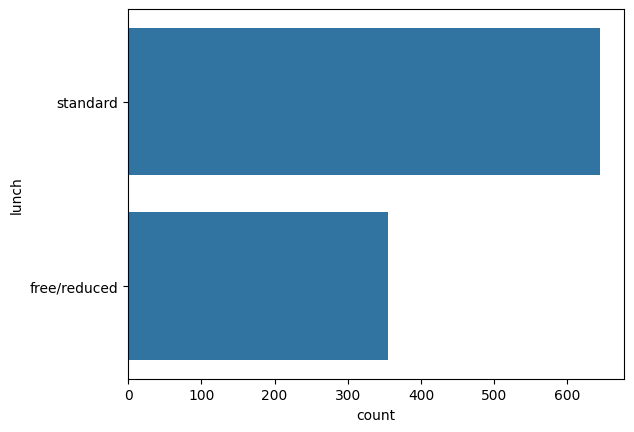

In [38]:
sns.countplot(data=df['lunch'])

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [39]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

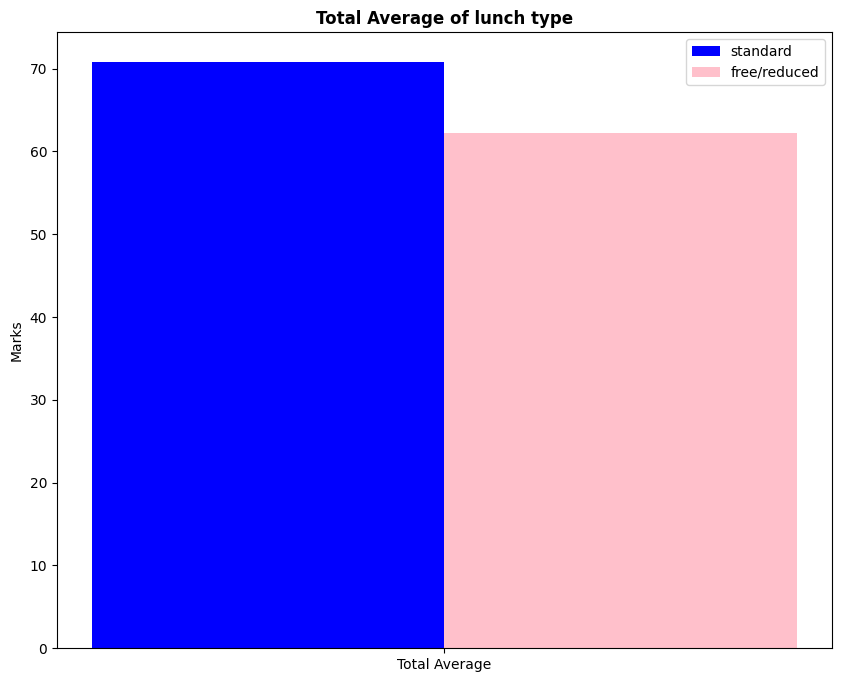

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Group by 'gender' and calculate the mean for desired columns
gender_group = df.groupby('lunch')[['AverageScore']].mean()

plt.figure(figsize=(10, 8))

# Define categories
X = ['Total Average']

# Extract scores for each gender
standard_scores = [gender_group.loc['standard', 'AverageScore']]
freereduced_scores = [gender_group.loc['free/reduced', 'AverageScore']]

# Bar positions
X_axis = np.arange(len(X))

# Plot bars
plt.bar(X_axis - 0.2, standard_scores, width=0.4, label='standard', color='blue')
plt.bar(X_axis + 0.2, freereduced_scores, width=0.4, label='free/reduced', color='pink')

# Add labels, title, and legend
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average of lunch type", fontweight='bold')
plt.legend()

# Display the plot
plt.show()


#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

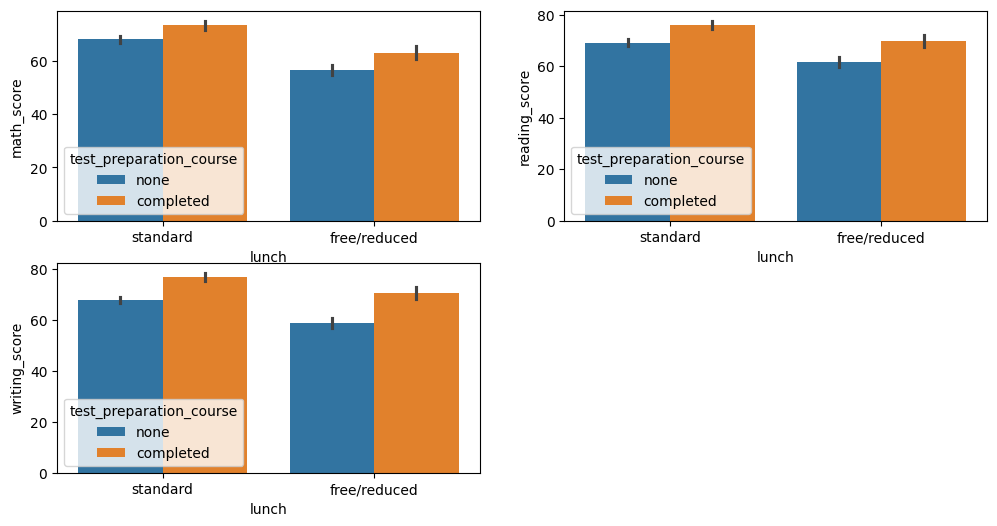

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Checking Outliers

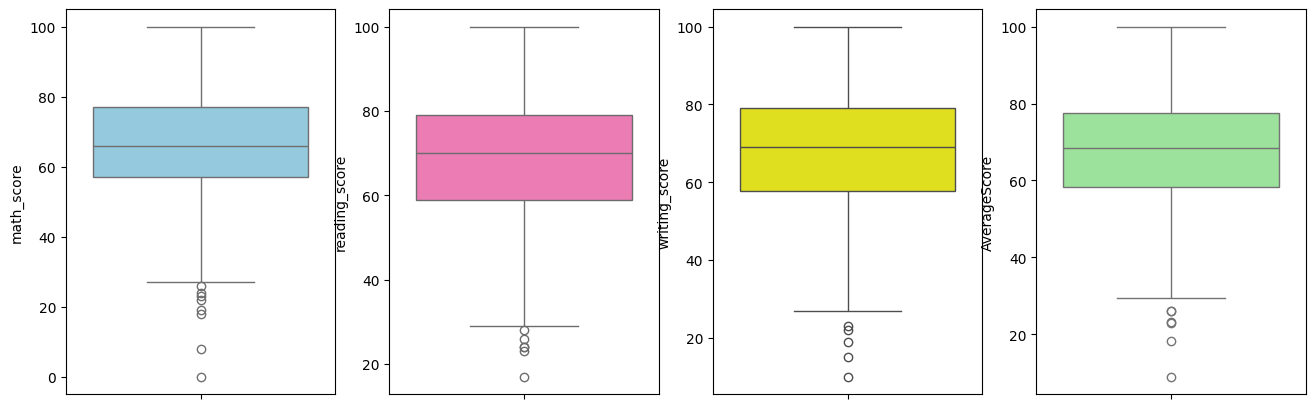

In [42]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['AverageScore'],color='lightgreen')
plt.show()